### The hardest part of options trading is determining if they are cheap or expensive. Whether you buy or sell an option, you’re exposed to the volatility of the underlying. That’s why it’s important to compare volatility to its recent levels.

In [1]:
%matplotlib inline

import yfinance as yf
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
"""
windows defines the number of days 
I want to use to compute volatility. 
quantiles defines the percentage of the top and bottom 25% of values.
"""

windows = [30, 60, 90, 120]
quantiles = [.25, .75]

min_ = []
max_ = []
median = []
top_q = []
bottom_q = []
realized = []

In [3]:
data = yf.download("JPM", start="2021-01-01", end='2021-12-31')

[*********************100%***********************]  1 of 1 completed


### Realized volatility is a measurement of how much the price or returns of stock vary. It’s used to optimize portfolios, detect regime changes, and price derivatives

In [4]:
def realized_vol(price_data, window=30):
    log_return = (price_data['Close'] / price_data['Close'].shift(1)).apply(np.log)
    
    return log_return.rolling(window=window, center=False).std() * math.sqrt(252)

In [5]:
for window in windows:
    
    estimator = realized_vol(window=window, price_data=data)
    
    min_.append(estimator.min())
    max_.append(estimator.max())
    median.append(estimator.median())
    top_q.append(estimator.quantile(quantiles[1]))
    bottom_q.append(estimator.quantile(quantiles[0]))
    realized.append(estimator[-1])

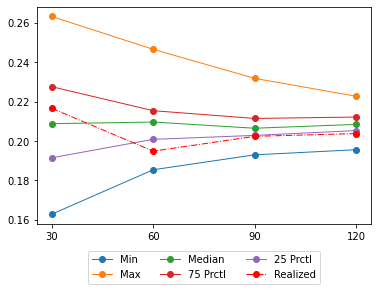

In [8]:
plt.plot(windows, min_, "-o", linewidth=1, label="Min")
plt.plot(windows, max_, "-o", linewidth=1, label="Max")
plt.plot(windows, median, "-o", linewidth=1, label="Median")
plt.plot(windows, top_q, "-o", linewidth=1, label=f"{quantiles[1] * 100:.0f} Prctl")
plt.plot(windows, bottom_q, "-o", linewidth=1, label=f"{quantiles[0] * 100:.0f} Prctl")
plt.plot(windows, realized, "ro-.", linewidth=1, label="Realized")

plt.xticks(windows)

plt.legend(loc="upper center", bbox_to_anchor=(.5, -.1), ncol=3)

### There was a drop in realized volatility which means stock price increased

### Realized volatility is near to the lowest and below the 25th percentile most of time supporting the case to explore long exposure to the option (option is cheap)

In [9]:
def realized_vol(price_data, window=30):
    log_return = (price_data['Close'] / price_data['Close'].shift(1)).apply(np.log)

    return log_return.rolling(window=window, center=False).std() * math.sqrt(252)
    
def options_cone_volatility(symbol, start, end):
    windows = [30, 60, 90, 120]
    quantiles = [.25, .75]

    min_ = []
    max_ = []
    median = []
    top_q = []
    bottom_q = []
    realized = []
    
    data = yf.download(symbol, start=start, end=end)
    
    for window in windows:
    
        estimator = realized_vol(window=window, price_data=data)

        min_.append(estimator.min())
        max_.append(estimator.max())
        median.append(estimator.median())
        top_q.append(estimator.quantile(quantiles[1]))
        bottom_q.append(estimator.quantile(quantiles[0]))
        realized.append(estimator[-1])
        
    plt.plot(windows, min_, "-o", linewidth=1, label="Min")
    plt.plot(windows, max_, "-o", linewidth=1, label="Max")
    plt.plot(windows, median, "-o", linewidth=1, label="Median")
    plt.plot(windows, top_q, "-o", linewidth=1, label=f"{quantiles[1] * 100:.0f} Prctl")
    plt.plot(windows, bottom_q, "-o", linewidth=1, label=f"{quantiles[0] * 100:.0f} Prctl")
    plt.plot(windows, realized, "ro-.", linewidth=1, label="Realized")

    plt.xticks(windows)

    plt.legend(loc="upper center", bbox_to_anchor=(.5, -.1), ncol=3)

[*********************100%***********************]  1 of 1 completed


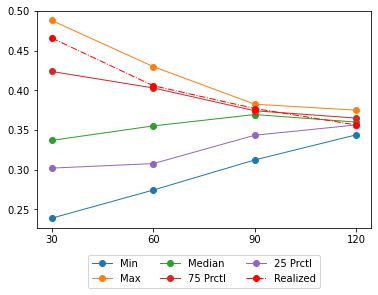

In [19]:
options_cone_volatility("AAPL", '2022-01-01', '2022-12-09') # Apple

[*********************100%***********************]  1 of 1 completed


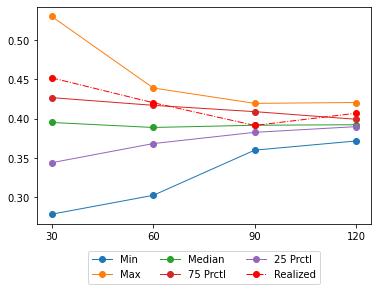

In [18]:
options_cone_volatility("GOOGL", '2022-01-01', '2022-12-09') #GOOGLE/ALPHABET

[*********************100%***********************]  1 of 1 completed


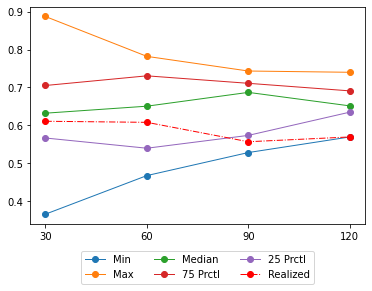

In [17]:
options_cone_volatility("TSLA", '2022-01-01', '2022-12-09') # Tesla

[*********************100%***********************]  1 of 1 completed


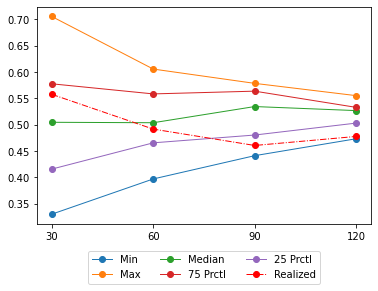

In [16]:
options_cone_volatility("AMZN", '2022-01-01', '2022-12-09') # AMAZON

[*********************100%***********************]  1 of 1 completed


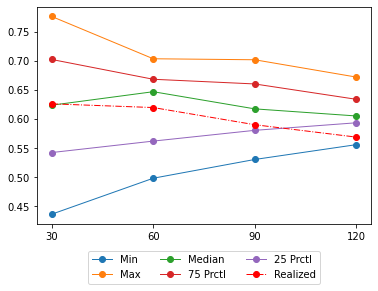

In [15]:
options_cone_volatility("AMD", '2022-01-01', '2022-12-09') # AMD